# **Import Libraries**

In [40]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# **Getting know data**

In [41]:
df=pd.read_csv("Fish.csv")

In [42]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [6]:
df["Species"].value_counts()


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [9]:
df['Species'].value_counts(normalize=True)

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

In [10]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


# **Visualisation**

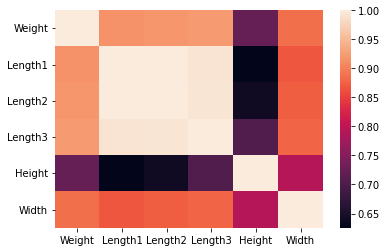

In [11]:
sns.heatmap(df.corr())

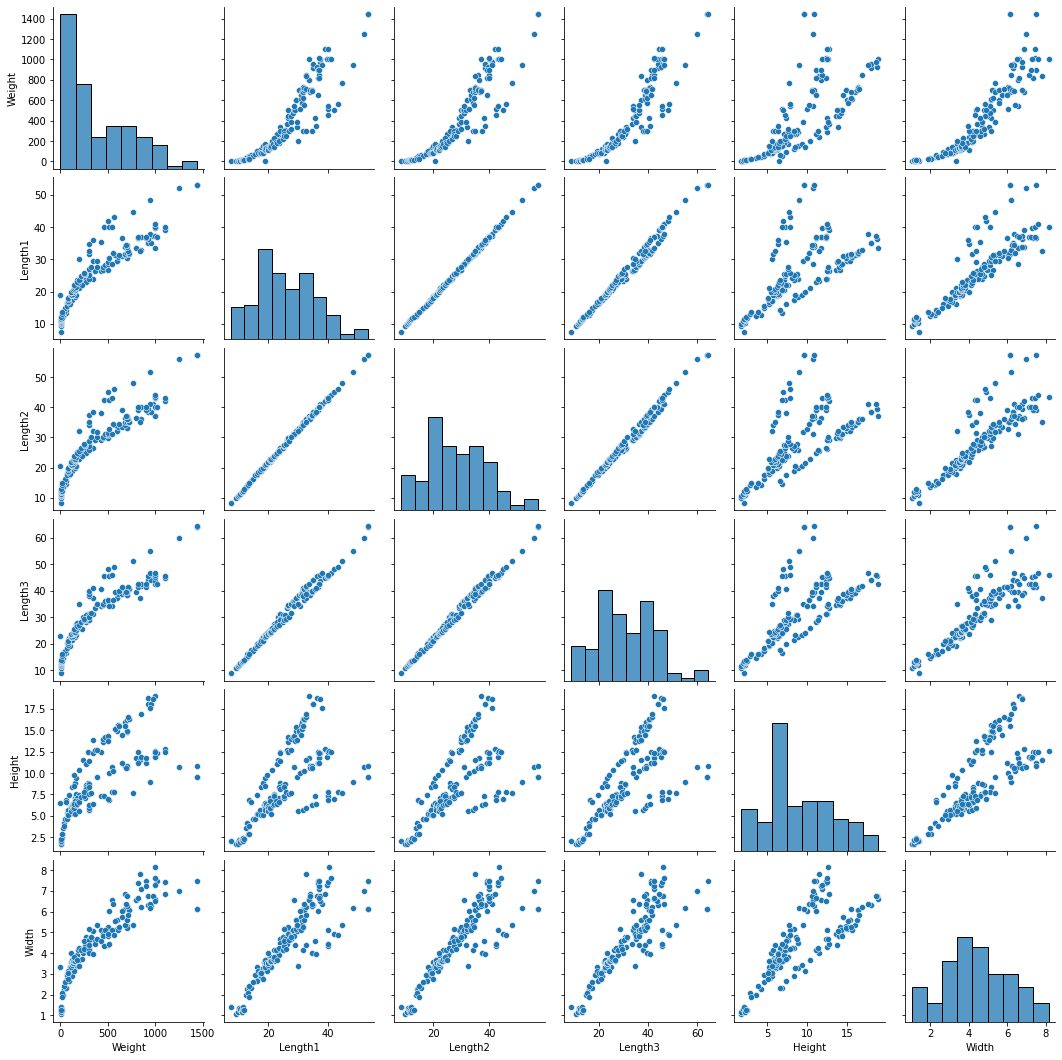

In [26]:
sns.pairplot(df, kind='scatter')


# **Getting numeric and categorical columns**

In [43]:
numeric_cols=df._get_numeric_data().columns
print(numeric_cols)

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')


In [44]:
cat_cols=set(df.columns)-set(numeric_cols)
print(cat_cols)

{'Species'}


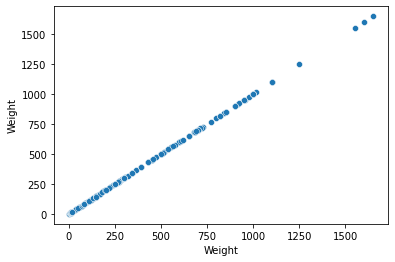

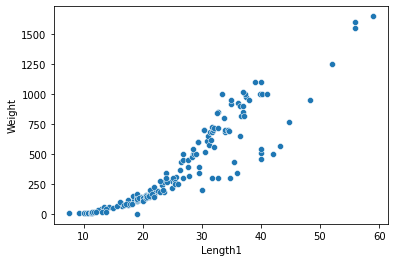

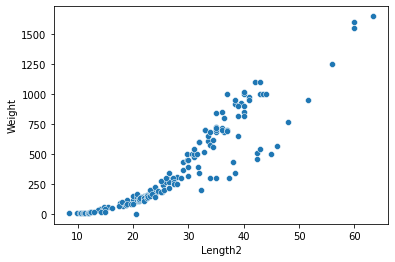

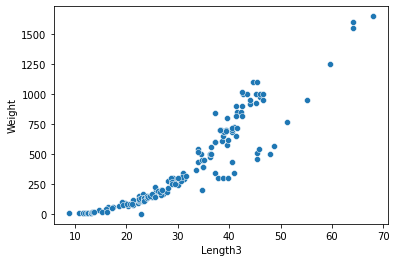

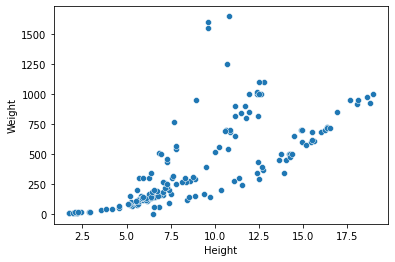

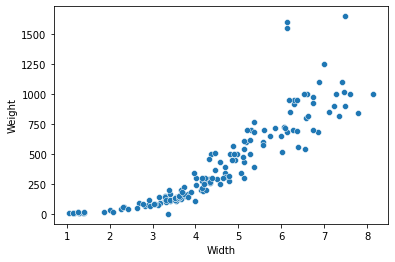

In [45]:
for col in numeric_cols:
  sns.scatterplot(x=col, y='Weight', data=df)
  plt.show()


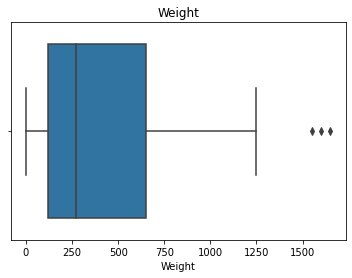

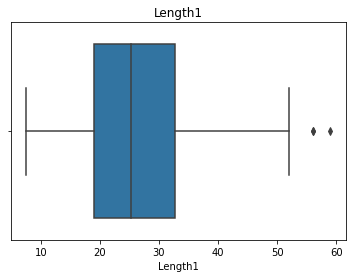

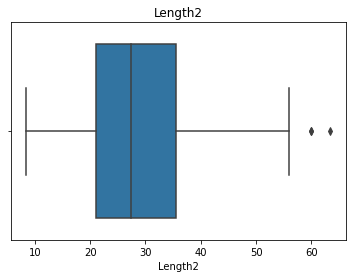

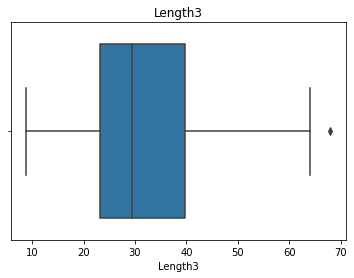

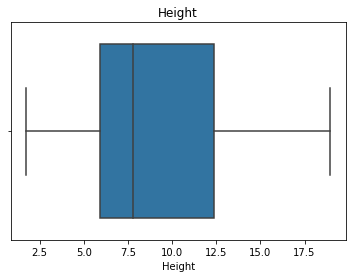

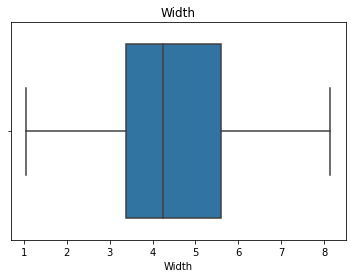

In [46]:
for col in numeric_cols:
  plt.title(col)
  sns.boxplot(df[col])
  plt.show()

# **Outliers**

In [47]:
def outliers(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df.loc[(df[col]<lower_bound), col ]=lower_bound
  df.loc[(df[col]>upper_bound), col ]=upper_bound
  return df

In [48]:
for col in numeric_cols:
    df=outliers(df, col)

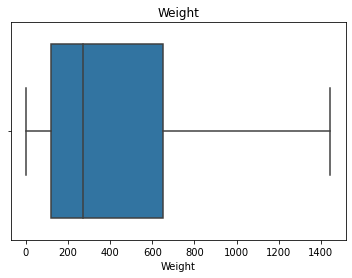

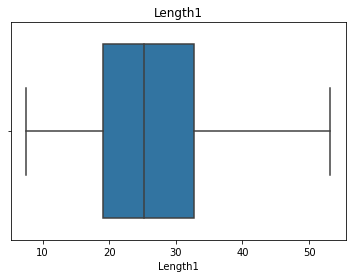

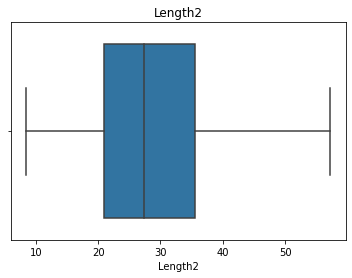

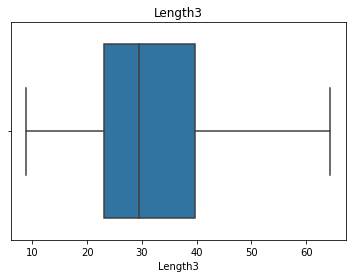

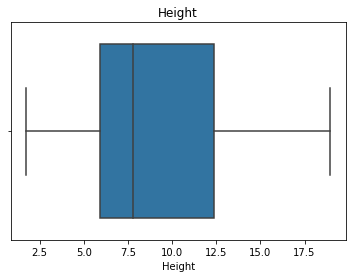

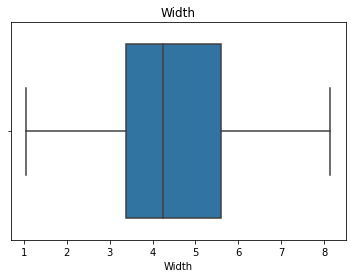

In [49]:
for col in numeric_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [25]:
df.shape

(159, 7)

# **Linear Regression and Polynomial Regression**

In [50]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [52]:
data=df[['Width', 'Weight']]

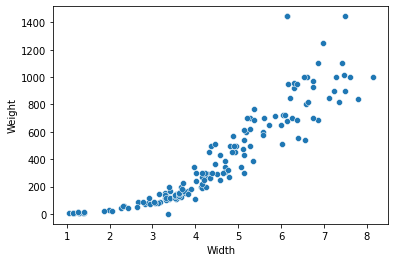

In [53]:
sns.scatterplot(x='Width', y='Weight', data=data)

In [55]:
X=data.drop('Weight', axis=1)
Y=data['Weight']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.20)
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)
train_error=mean_squared_error(Y_train, Y_train_pred)
test_error=mean_squared_error(Y_test, Y_test_pred)
print(f'Train error: {train_error}\nTest error: {test_error}')

Train error: 23083.723746410305
Test error: 24626.55379439577


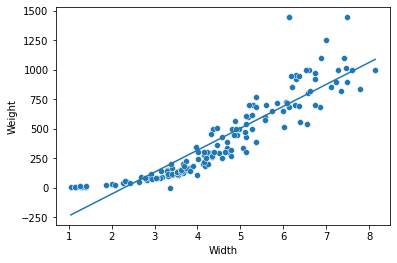

In [56]:
lr=LinearRegression()
lr.fit(X, Y)
sns.scatterplot(x='Width', y='Weight', data=data)
sns.lineplot(data['Width'], lr.predict(X) )

# **Polynomial regression**

In [62]:
def poly_model(X, Y, degree):
    poly=PolynomialFeatures(degree=degree)
    X_poly=poly.fit_transform(X)
    X_poly=pd.DataFrame(X_poly, columns=poly.get_feature_names())
    X_train, X_test, Y_train, Y_test=train_test_split(X_poly, Y, random_state=42, test_size=0.20)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    Y_train_pred=lr.predict(X_train)
    Y_test_pred=lr.predict(X_test)
    train_error=np.log1p(mean_squared_error(Y_train, Y_train_pred))
    test_error=np.log1p(mean_squared_error(Y_test, Y_test_pred))
    return train_error, test_error

In [63]:
X=data.drop('Weight', axis=1)
Y=data['Weight']

In [64]:
res={'degree':[], 'train_error':[], 'test_error':[]}
for degree in range(1, 20):
    cvb=poly_model(X, Y, degree)
    res['degree'].append(degree)
    res['train_error'].append(cvb[0])
    res['test_error'].append(cvb[1])

In [65]:
res=pd.DataFrame(res)
print(res)

    degree  train_error  test_error
0        1    10.046926   10.111621
1        2     9.845479    9.709220
2        3     9.722350    9.289903
3        4     9.696105    9.234533
4        5     9.689195    9.220374
5        6     9.685746    9.308944
6        7     9.680400    9.287641
7        8     9.659537   10.346295
8        9     9.629034   11.874208
9       10     9.616157   12.773425
10      11     9.615709   12.497097
11      12     9.613803   11.301985
12      13     9.614096   11.051803
13      14     9.614068   11.601463
14      15     9.613411   12.774854
15      16     9.613887   12.741210
16      17     9.612457   14.293588
17      18     9.611933   15.217556
18      19     9.612288   15.445812


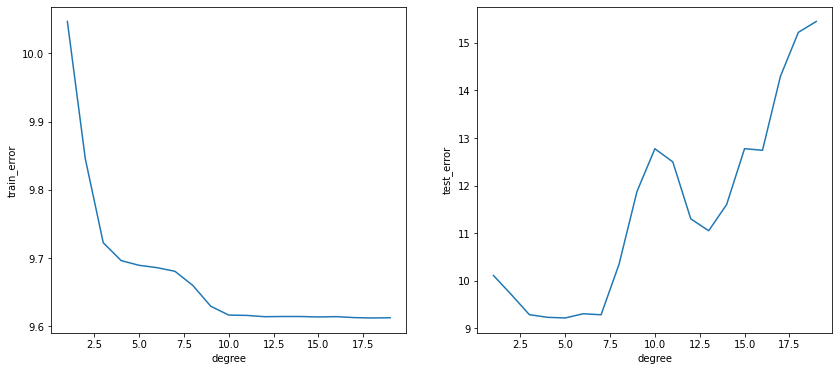

In [66]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.lineplot(x=res['degree'], y=res['train_error'], ax=axes[0])
sns.lineplot(x=res['degree'], y=res['test_error'], ax=axes[1])

# **Linear Regression**

In [67]:
df=pd.get_dummies(df, drop_first=True)

In [68]:
X=df.drop('Weight', axis=1)
Y=df['Weight']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=0, test_size=0.20)
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)
train_error=mean_squared_error(Y_train, Y_train_pred)
test_error=mean_squared_error(Y_test, Y_test_pred)
print(f'Train error: {train_error}\nTest error: {test_error}')

Train error: 6232.803593132659
Test error: 10023.04121554831


# **Cross Validation Score**

In [69]:
X=df.drop('Weight', axis=1)
Y=df['Weight']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=0, test_size=0.20)

In [70]:
lr=LinearRegression()
scores=-cross_val_score(lr, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')

In [71]:
print(scores.mean())

10275.622715769507


In [72]:
res={'degree':[], 'train_error':[], 'test_error':[]}
for degree in range(1, 6):
    cvb=poly_model(X, Y, degree)
    res['degree'].append(degree)
    res['train_error'].append(cvb[0])
    res['test_error'].append(cvb[1])

In [73]:
res=pd.DataFrame(res)
print(res)

   degree   train_error  test_error
0       1  8.788051e+00    8.900108
1       2  7.249331e+00    8.739065
2       3  1.848216e-12   17.935844
3       4  1.502741e-13   18.732490
4       5  1.580733e-12   19.593191
